### Chemical space overlap:

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import check_validity, computeUMAP, get_props

In [17]:
# file1 = 'all_data/obj1.txt'
file1 = 'all_data/obj3.txt'

df1 = pd.read_csv(file1, header=None)
smis1 = list(df1[0])

In [18]:
# file2 = 'gen_smis/RL_G_0_single_best__all_smis_.txt'
file2 = 'gen_smis/RL_G_0_multi_best__all_smis_.txt'

df2 = pd.read_csv(file2, header=None)
smis2 = list(df2[0])

In [19]:
# file3 = 'gen_smis/RL_G_1_single_best__all_smis_.txt'
file3 = 'gen_smis/RL_G_1_multi_best__all_smis_.txt'

df3 = pd.read_csv(file3, header=None)
smis3 = list(df3[0])

In [20]:
# file4 = 'gen_smis/RL_G_2_single_best__all_smis_.txt'
file4 = 'gen_smis/RL_G_2_multi_best__all_smis_.txt'

df4 = pd.read_csv(file4, header=None)
smis4 = list(df4[0])

In [22]:
val1 = []
val2 = []
val3 = []
val4 = []
for s1, s2, s3, s4 in zip(smis1, smis2, smis3, smis4):
    v1 = check_validity(s1)
    if v1 == 1:
        val1.append(s1)
        
    v2 = check_validity(s2)
    if v2 == 1:
        val2.append(s2)
        
    v3 = check_validity(s3)
    if v3 == 1:
        val3.append(s3)
        
    v4 = check_validity(s4)
    if v4 == 1:
        val4.append(s4)
        
print(len(val1))
print(len(val2))
print(len(val3))
print(len(val4))

print("-----------------------------")
unq1 = list(set(val1))
unq2 = list(set(val2))
unq3 = list(set(val3))
unq4 = list(set(val4))
print(len(unq1))
print(len(unq2))
print(len(unq3))
print(len(unq4))

print("----------------------------")
des1 = []
des2 = []
des3 = []
des4 = []
for s1, s2, s3, s4 in zip(unq1, unq2, unq3, unq4):
#     prop1 = get_props(s1, c=0)
#     if prop1<=3:
#         des1.append(s1)
    prop1, prop2, prop3, prop4, prop5 = get_props(s1, c=1)
    if prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des1.append(s1)
    
#     prop1 = get_props(s2, c=0)
#     if prop1<=3:
#         des2.append(s2)
    prop1, prop2, prop3, prop4, prop5 = get_props(s2, c=1)
    if prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des2.append(s2)
        
#     prop1 = get_props(s3, c=0)
#     if prop1<=3:
#         des3.append(s3)
    prop1, prop2, prop3, prop4, prop5 = get_props(s3, c=1)
    if prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des3.append(s3)
        
#     prop1 = get_props(s4, c=0)
#     if prop1<=3:
#         des4.append(s4)
    prop1, prop2, prop3, prop4, prop5 = get_props(s4, c=1)
    if prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des4.append(s4)


print(len(des1))
print(len(des2))
print(len(des3))
print(len(des4))

10000
8579
8985
8965
-----------------------------
9998
2751
1952
2297
----------------------------
1952
611
467
422


In [23]:
L = min(5000, len(des1), len(des2), len(des3), len(des4))
des1_, des2_, des3_, des4_ = random.sample(des1, L), random.sample(des2, L), random.sample(des3, L), random.sample(des4, L)

print(L)

422


In [24]:
umap_X1 = computeUMAP(des1_)
umap_X2 = computeUMAP(des2_)
umap_X3 = computeUMAP(des3_)
umap_X4 = computeUMAP(des4_)

**The hope is that:** 

    By applying curiosity we forced the agent to switch its focus from one part pf the chemical space (in ornage) 
    to another part of the chemical space (in green). We beleive that this way, one can cover many parts of the space
    by keep changing the sequencially

# --------------------------- Desirables:

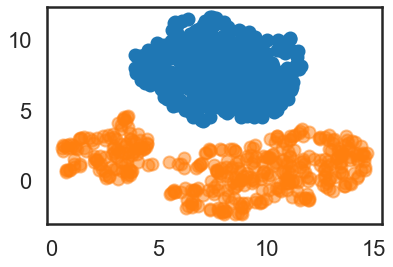

In [25]:
plt.scatter(umap_X1.T[0], umap_X1.T[1], alpha=1)  
plt.scatter(umap_X2.T[0], umap_X2.T[1], alpha=0.5) 
# plt.savefig('umap_data_VS_RL_G_0_single.png', dpi=300)
plt.savefig('umap_data_VS_RL_G_0_multi.png', dpi=300)

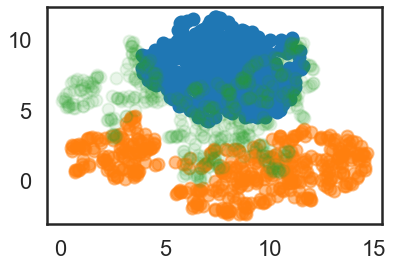

In [33]:
# chembl21 VS RL-G-0 VS RL-G-1, for single objective
plt.scatter(umap_X1.T[0], umap_X1.T[1], alpha=1)  
plt.scatter(umap_X2.T[0], umap_X2.T[1], alpha=0.5)  
plt.scatter(umap_X3.T[0], umap_X3.T[1], alpha=0.1)
# plt.savefig('umap_data_VS_RL_G_0_1_single.png', dpi=300)
plt.savefig('umap_data_VS_RL_G_0_1_multi.png', dpi=300)

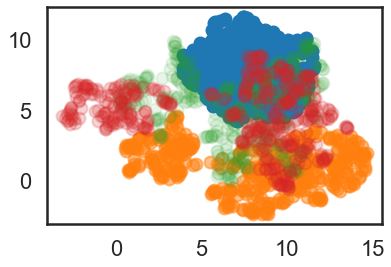

In [37]:
# chembl21 VS RL-G-0 VS RL-G-1, RL-G-2,  for single objective
plt.scatter(umap_X1.T[0], umap_X1.T[1], alpha=1)  
plt.scatter(umap_X2.T[0], umap_X2.T[1], alpha=0.5)  
plt.scatter(umap_X3.T[0], umap_X3.T[1], alpha=0.1)
plt.scatter(umap_X4.T[0], umap_X4.T[1], alpha=0.2)
# plt.savefig('umap_data_VS_RL_G_0_1_2_single.png', dpi=300)
plt.savefig('umap_data_VS_RL_G_0_1_2_multi.png', dpi=300)

In [ ]:
# a new part of the chemical space was discovered (the red one on the left) 

In [28]:
# file5 = 'gen_smis/RL_G_3_single_best__all_smis_.txt'
file5 = 'gen_smis/RL_G_3_multi_best__all_smis_.txt'

df5 = pd.read_csv(file5, header=None)
smis5 = list(df5[0])

val5 = []
for s5 in smis5:
    v5 = check_validity(s5)
    if v5 == 1:
        val5.append(s5)
        
unq5 = list(set(val5))

des5 = []
for s5 in unq5:
#     prop1 = get_props(s5, c=0)
#     if prop1<=3:
#         des5.append(s5)
    prop1, prop2, prop3, prop4, prop5 = get_props(s5, c=1)
    if prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des5.append(s5)
        
print(len(des5))
if len(des5) > L:
    des5_ = random.sample(des5, L)
else:
    des5_ = des5

umap_X5 = computeUMAP(des5_)

print(len(des5_))

406
406


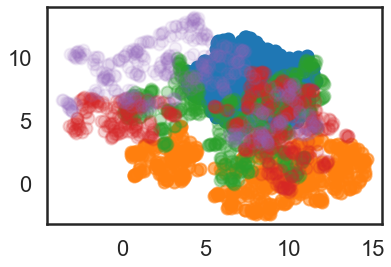

In [38]:
# chembl21 VS RL-G-0 VS RL-G-1, RL-G-2 VS RL-G-3,  for single objective
plt.scatter(umap_X1.T[0], umap_X1.T[1], alpha=1)  
plt.scatter(umap_X2.T[0], umap_X2.T[1], alpha=0.6)  
plt.scatter(umap_X3.T[0], umap_X3.T[1], alpha=0.3)
plt.scatter(umap_X4.T[0], umap_X4.T[1], alpha=0.2)
plt.scatter(umap_X5.T[0], umap_X5.T[1], alpha=0.1)
# plt.savefig('umap_data_VS_RL_G_0_1_2_3_single.png', dpi=300)
plt.savefig('umap_data_VS_RL_G_0_1_2_3_multi.png', dpi=300)

In [ ]:
# another part of the chemical space was discovered (the magenta on the left)

In [31]:
# file6 = 'gen_smis/RL_G_4_single_best__all_smis_.txt'
file6 = 'gen_smis/RL_G_4_multi_best__all_smis_.txt'

df6 = pd.read_csv(file6, header=None)
smis6 = list(df6[0])

val6 = []
for s6 in smis6:
    v6 = check_validity(s6)
    if v6 == 1:
        val6.append(s6)
        
unq6 = list(set(val6))

des6 = []
for s6 in unq6:
#     prop1 = get_props(s6, c=0)
#     if prop1<=3:
#         des6.append(s6)
    prop1, prop2, prop3, prop4, prop5 = get_props(s6, c=1)
    if prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des6.append(s6)
        
print(len(des6))
if len(des6) > L:
    des6_ = random.sample(des6, L)
else:
    des6_ = des6

umap_X6 = computeUMAP(des6_)

print(len(des6_))

368
368


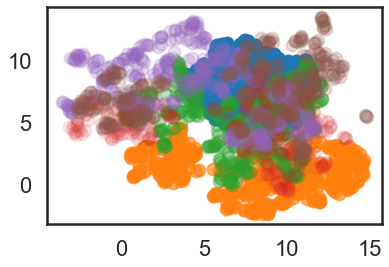

In [39]:
# chembl21 VS RL-G-0 VS RL-G-1, RL-G-2 VS RL-G-3,  for single objective
plt.scatter(umap_X1.T[0], umap_X1.T[1], alpha=1)  
plt.scatter(umap_X2.T[0], umap_X2.T[1], alpha=0.6)  
plt.scatter(umap_X3.T[0], umap_X3.T[1], alpha=0.3)
plt.scatter(umap_X4.T[0], umap_X4.T[1], alpha=0.1)
plt.scatter(umap_X5.T[0], umap_X5.T[1], alpha=0.2)
plt.scatter(umap_X6.T[0], umap_X6.T[1], alpha=0.2)
# plt.savefig('umap_data_VS_RL_G_0_1_2_3_4_single.png', dpi=300)
plt.savefig('umap_data_VS_RL_G_0_1_2_3_4_multi.png', dpi=300)